In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

%matplotlib inline

## 1. Logistic Regression
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant's probability of admission based the scores from those two exams.

In [328]:
data = np.loadtxt('machine-learning-ex2/ex2/ex2data1.txt', delimiter=",")
X, y = data[:, :2], data[:, 2]

In [329]:
print(X)
print()
print(y)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

In [330]:
y_col = y.reshape(-1,1)

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. Display a figure where the axes are the two exam scores, and the positive and negative examples are shown with dierent markers.

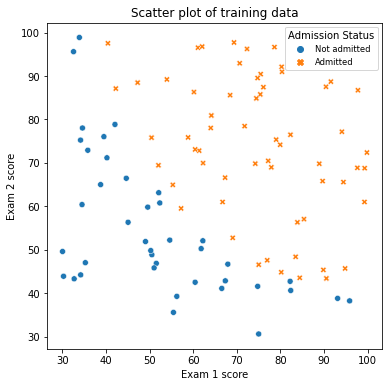

In [331]:
# Change the y values for plotting
y_labels = np.where(y < 1, "Not admitted", "Admitted")

# Create the scatter plot using seaborn and matplotlib to change the figure size and legend
fig, ax = plt.subplots(figsize=(6,6))

scatter = sns.scatterplot(ax=ax, x=X[:,0], y=X[:,1], style=y_labels, hue=y_labels, cmap='bright')
scatter.set(title="Scatter plot of training data", xlabel="Exam 1 score", ylabel = "Exam 2 score")

plt.legend(title='Admission Status', loc='upper right', fontsize='small')
plt.show()
pass

### 1.2 Implementation

In [332]:
# Add an X0 for every sample for gradient descenet
X_grad = np.hstack((np.ones((X.shape[0], 1)), X))
X_grad.shape

(100, 3)

In [333]:
# Set the initial theta parameters
theta = np.zeros((1,X_grad.shape[1]))
theta.shape

(1, 3)

In [334]:
# Set the learning rate and number of iterations
alpha = 0.004
iters = 1000000

#### 1.2.1 Sigmoid Function

In [335]:
# Define a sigmoid function implementation
def sigmoid(x):
    
    return 1/(1+np.exp(-x))

#### 1.2.2 Logistic Regression Cost Function

In [336]:
# Define the cost function
def cost_function(X, y, theta):
    
    hypothesis = sigmoid(np.matmul(X, theta.T))
    to_sum = np.matmul(-y, np.log(hypothesis)) - np.matmul(1-y, np.log(1-hypothesis))
    return np.sum(to_sum)/len(y)

#### 1.2.3 Logistic Regression Batch Gradient Descent

In [337]:
# Define the gradient descent function

def gradient_descent(X, y, theta, alpha, iterations):
        
    for i in range(iterations):  
                
        # Find the hypothesis function via cross product of X and theta tranposed
        hypothesis = sigmoid(np.matmul(X, theta.T))
                
        # Calculate the value of the derivative of the cost function
        cost_derivative = np.sum((hypothesis-y)*X, axis=0)
        
        # Simultaneously update the theta parameter vector
        theta = theta - ((alpha/len(y))*cost_derivative)
        thetas.append(theta)
    
    return thetas

In [338]:
# Check the cost function when theta is set to 0
cost_function(X_grad, y, theta)

0.6931471805599453

In [339]:
# Run gradient descent
thetas = gradient_descent(X_grad, y_col, theta, alpha, iters)
final_theta = thetas[-1]
final_theta

array([[-24.70890292,   0.20261299,   0.19781062]])

In [340]:
# Print the final cost
cost_function(X_grad, y, final_theta)

0.20352861825767435

#### 1.2.4 Evaluate Logistic Regression

Now we can plot the decision boundary using the final theta parameters.

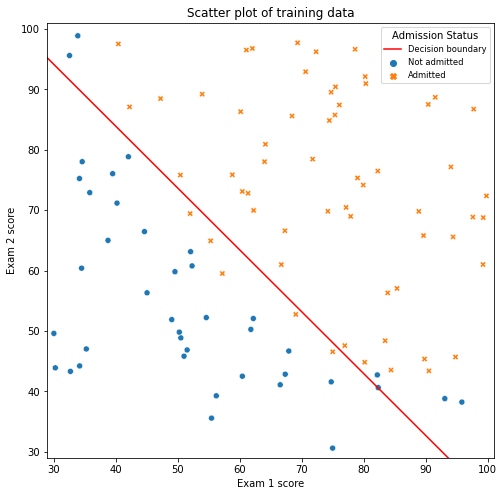

In [356]:
# Create a decision boundary on top of the old scatter plot

# When y = 1, z >= 0, and when y = 0, z <= 0, so the decision boundary is at z = 0
# ===> theta_0*x_0 + theta_1*x_1 + theta_2*x_2 = 0
x1 = np.linspace(0,100,71)
x2 = (-final_theta[0][0] - final_theta[0][1]*x1)/final_theta[0][2]

# Create the scatter plot using seaborn and matplotlib to change the figure size and legend
fig, ax = plt.subplots(figsize=(8,8))

scatter = sns.scatterplot(ax=ax, x=X[:,0], y=X[:,1], style=y_labels, hue=y_labels, cmap='bright')
scatter.set(title="Scatter plot of training data", xlabel="Exam 1 score", ylabel = "Exam 2 score")

# Plot the decision boundary
plt.plot(x1, x2, 'r', label="Decision boundary")

plt.xlim(29, 101)
plt.ylim(29, 101)
plt.legend(title='Admission Status', loc='upper right', fontsize='small')
plt.show()
pass

In [360]:
# Predict the classes of the samples
hypothesis = sigmoid(np.matmul(X_grad, final_theta.T))
predicted = np.where(hypothesis >= 0.5, 1, 0)
predicted

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

In [364]:
# Evaluate the training accuracy
print(classification_report(y_col, predicted))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        40
         1.0       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

